# Part 3: Kernel PCA
 **_TABLE OF CONTENT_**
     0. General Functions
     1. AAPL
        1.1 Kernel PCA
        1.2 KNN
        1.3 SVM
        1.4 LR
     2. AMZN
     3. GOOG
     4. FB
     5. NFLX

In [1]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from preprocessing import create_basetable
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from helpFunctions import *

## 0. GENERAL FUNCTIONS

Initialize some variables for later use throughout notebook

In [2]:
start_independent = date(2020, 3, 22)
end_independent= date(2020, 11, 30)
start_dependent = date(2020, 12, 1)

Function that creates a random Forest classifier given a training and test set

In [3]:
def mlpClassifier(scaled_train_X, scaled_test_X, train_y, test_y):
    mlp = MLPClassifier(random_state=123)
    mlp.fit(scaled_train_X, train_y)
    pred = mlp.predict(scaled_test_X)
    evaluate_model(pred, test_y)

In [4]:
def svmClassifier(pca_train_X, train_y, pca_test_X, test_y):
    svc_classifier = SVC(random_state= 123)
    svc_classifier.fit(pca_train_X, train_y)
    pred = svc_classifier.predict(pca_test_X)
    evaluate_model(pred, test_y)

In [5]:
def lrClassifier(scaled_train_X, scaled_test_X, train_y, test_y):
    lr = LogisticRegression(penalty='l2', verbose = 1, random_state= 123, solver= 'liblinear', class_weight= 'balanced')
    lr.fit(scaled_train_X, train_y)
    pred = lr.predict(scaled_test_X)
    evaluate_model(pred, test_y)


### 1. Apple
#### 1.1 Data Retrieval and KPCA
Retrieve the training and test set for APPLE stock

In [6]:
%%time
tck = 'AAPL'
# Retrieved scaled
# train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck,
                                                                  start_independent= start_independent,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 1min 1s


Show the initial shape of the training set:

In [7]:
scaled_train_X.shape

(152, 136)

Check the balance in training set of observations per category

In [8]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  71
Number of sell observations :  40
Number of buy observations :  31


Employ KPCA to reduce the dimensionality of the feature space


In [9]:
%%time
kpca = KernelPCA(n_components= 26, kernel='poly', random_state=123)
kpca.fit(scaled_train_X)
kpca_train_X = kpca.transform(scaled_train_X)
kpca_test_X = kpca.transform(scaled_test_X)

Wall time: 59.9 ms


Inspect the dimensionality after PCA
Number of features has reduced drastically

In [10]:
kpca_train_X.shape

(152, 26)

#### 1.2 MLP

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC: 0.5024193548387097
              precision    recall  f1-score   support

           0       0.57      0.65      0.60        40
           1       0.44      0.35      0.39        31

    accuracy                           0.52        71
   macro avg       0.50      0.50      0.50        71
weighted avg       0.51      0.52      0.51        71



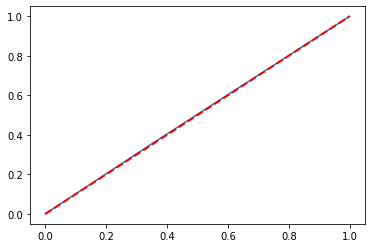

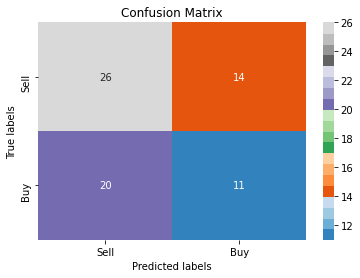

In [11]:
mlpClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

#### 1.3 SVM

AUC: 0.4798387096774194
              precision    recall  f1-score   support

           0       0.53      0.25      0.34        40
           1       0.42      0.71      0.53        31

    accuracy                           0.45        71
   macro avg       0.47      0.48      0.43        71
weighted avg       0.48      0.45      0.42        71



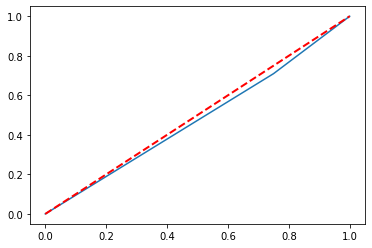

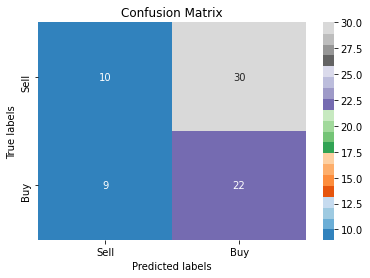

In [12]:
svmClassifier(kpca_train_X, train_y, kpca_test_X, test_y)

#### 1.4 LR


[LibLinear]AUC: 0.5
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        40
           1       0.00      0.00      0.00        31

    accuracy                           0.56        71
   macro avg       0.28      0.50      0.36        71
weighted avg       0.32      0.56      0.41        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

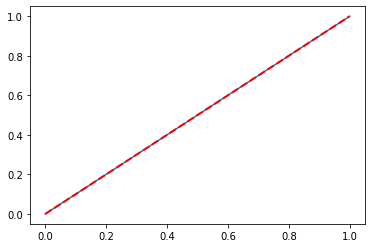

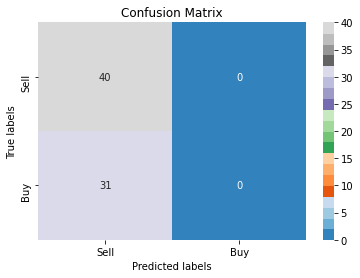

In [13]:
lrClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

### 2. AMZN
#### 2.1 Data Retrieval and KPCA

In [14]:
%%time
tck = 'AMZN'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 47.3 s


In [15]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  61
Number of buy observations :  91

--------Test set--------
Total number of observations:  71
Number of sell observations :  36
Number of buy observations :  35


In [16]:
%%time
kpca = KernelPCA(n_components= 26, kernel='poly', random_state=123)
kpca.fit(scaled_train_X)
kpca_train_X = kpca.transform(scaled_train_X)
kpca_test_X = kpca.transform(scaled_test_X)

Wall time: 60.1 ms


#### 2.2 MLP

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC: 0.5769841269841269
              precision    recall  f1-score   support

           0       0.58      0.61      0.59        36
           1       0.58      0.54      0.56        35

    accuracy                           0.58        71
   macro avg       0.58      0.58      0.58        71
weighted avg       0.58      0.58      0.58        71



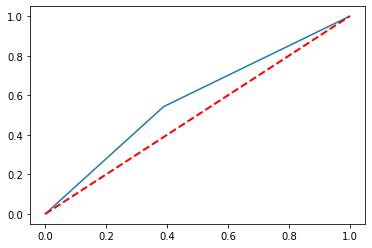

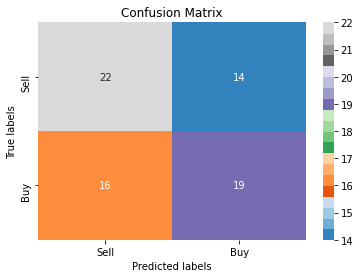

In [17]:
mlpClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

#### 2.3 SVM


AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.49      1.00      0.66        35

    accuracy                           0.49        71
   macro avg       0.25      0.50      0.33        71
weighted avg       0.24      0.49      0.33        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

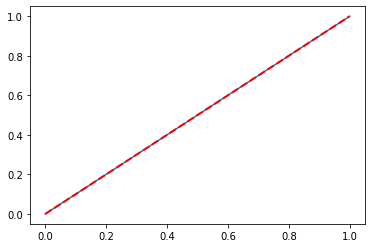

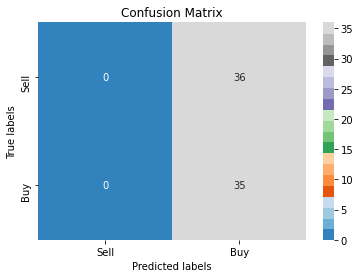

In [18]:
svmClassifier(kpca_train_X, train_y, kpca_test_X, test_y)

#### 2.4 LR

[LibLinear]AUC: 0.5865079365079365
              precision    recall  f1-score   support

           0       0.56      0.94      0.70        36
           1       0.80      0.23      0.36        35

    accuracy                           0.59        71
   macro avg       0.68      0.59      0.53        71
weighted avg       0.68      0.59      0.53        71



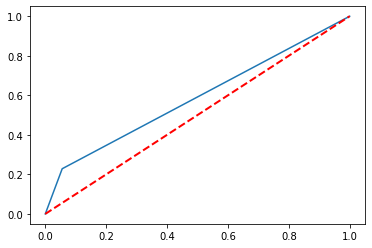

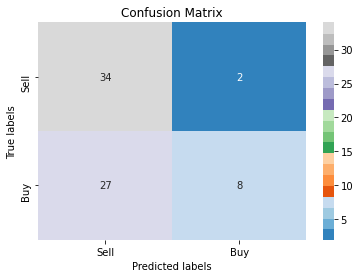

In [19]:
lrClassifier(kpca_train_X, kpca_test_X, train_y, test_y)

### 3. Google
#### 3.1 Data Retrieval and PCA

In [20]:
%%time
tck = 'GOOG'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 45.7 s


In [21]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  58
Number of buy observations :  94

--------Test set--------
Total number of observations:  71
Number of sell observations :  33
Number of buy observations :  38


In [22]:
%%time
kpca = KernelPCA(n_components= 26, kernel='poly', random_state=123)
kpca.fit(scaled_train_X)
kpca_train_X = kpca.transform(scaled_train_X)
kpca_test_X = kpca.transform(scaled_test_X)

Wall time: 27.9 ms


#### 3.2 MLP


AUC: 0.4792663476874003
              precision    recall  f1-score   support

           0       0.44      0.48      0.46        33
           1       0.51      0.47      0.49        38

    accuracy                           0.48        71
   macro avg       0.48      0.48      0.48        71
weighted avg       0.48      0.48      0.48        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


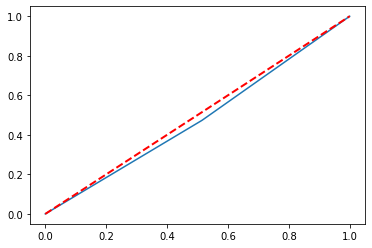

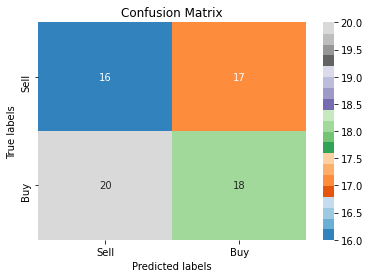

In [23]:
mlpClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

#### 3.2 SVM

AUC: 0.5322966507177034
              precision    recall  f1-score   support

           0       0.75      0.09      0.16        33
           1       0.55      0.97      0.70        38

    accuracy                           0.56        71
   macro avg       0.65      0.53      0.43        71
weighted avg       0.64      0.56      0.45        71



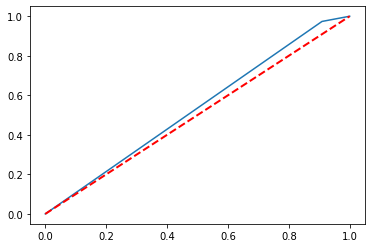

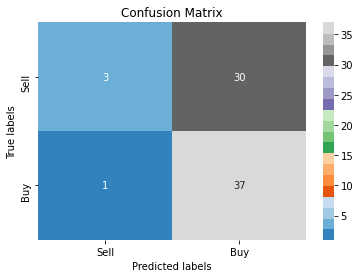

In [24]:
svmClassifier(kpca_train_X, train_y, kpca_test_X, test_y)

#### 3.3 LR

[LibLinear]AUC: 0.6447368421052632
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        33
           1       1.00      0.29      0.45        38

    accuracy                           0.62        71
   macro avg       0.78      0.64      0.58        71
weighted avg       0.79      0.62      0.57        71



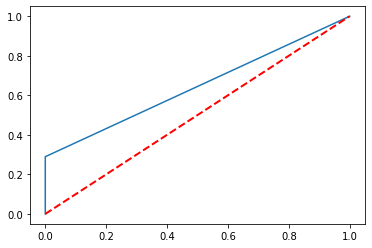

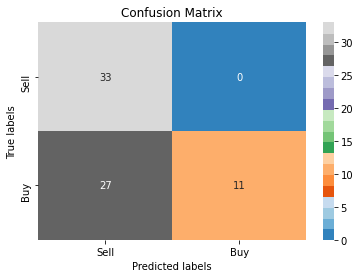

In [25]:
lrClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

### 4. Facebook
#### 4.1 Data Retrieval and PCA

In [26]:
%%time
tck = 'FB'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 49.5 s


In [27]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  152
Number of sell observations :  63
Number of buy observations :  89

--------Test set--------
Total number of observations:  71
Number of sell observations :  36
Number of buy observations :  35


In [28]:
%%time
kpca = KernelPCA(n_components= 26, kernel='poly', random_state=123)
kpca.fit(scaled_train_X)
kpca_train_X = kpca.transform(scaled_train_X)
kpca_test_X = kpca.transform(scaled_test_X)

Wall time: 20.5 ms


#### 4.2 MLP

AUC: 0.5575396825396824
              precision    recall  f1-score   support

           0       0.54      0.97      0.69        36
           1       0.83      0.14      0.24        35

    accuracy                           0.56        71
   macro avg       0.69      0.56      0.47        71
weighted avg       0.68      0.56      0.47        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


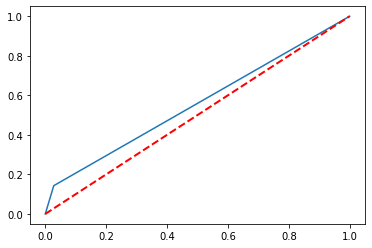

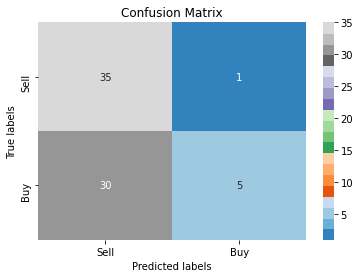

In [29]:
mlpClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

#### 4.3 SVM

AUC: 0.5146825396825396
              precision    recall  f1-score   support

           0       0.51      0.97      0.67        36
           1       0.67      0.06      0.11        35

    accuracy                           0.52        71
   macro avg       0.59      0.51      0.39        71
weighted avg       0.59      0.52      0.39        71



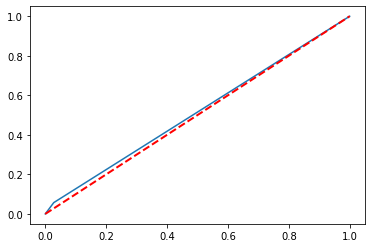

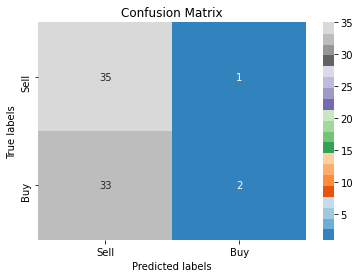

In [30]:
svmClassifier(kpca_train_X, train_y, kpca_test_X, test_y)

#### 4.4 LR

[LibLinear]AUC: 0.5
              precision    recall  f1-score   support

           0       0.51      1.00      0.67        36
           1       0.00      0.00      0.00        35

    accuracy                           0.51        71
   macro avg       0.25      0.50      0.34        71
weighted avg       0.26      0.51      0.34        71



c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

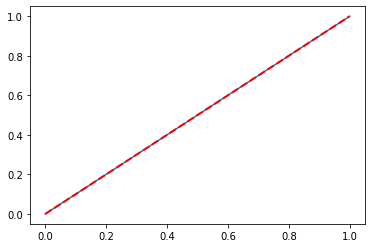

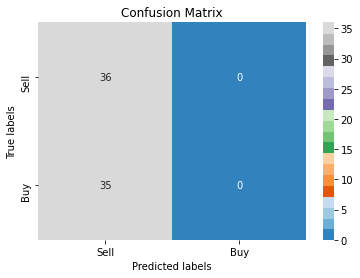

In [31]:
lrClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

### 5. Netflix
#### 5.1 Data Retrieval and PCA

In [32]:
%%time
tck = 'NFLX'
# Retrieved scaled train and test set for specified stock symbol
scaled_train_X, scaled_test_X, train_y, test_y = create_basetable(tck, start_independent= start_independent ,
                                                                  end_independent= end_independent,
                                                                  start_dependent= start_dependent)

Wall time: 44.5 s


In [33]:
buy_sell_observations(train_y, test_y)

--------Training set--------
Total number of observations:  151
Number of sell observations :  69
Number of buy observations :  82

--------Test set--------
Total number of observations:  71
Number of sell observations :  37
Number of buy observations :  34


In [34]:
%%time
kpca = KernelPCA(n_components= 26, kernel='poly', random_state=123)
kpca.fit(scaled_train_X)
kpca_train_X = kpca.transform(scaled_train_X)
kpca_test_X = kpca.transform(scaled_test_X)

Wall time: 18.7 ms


#### 5.2 KNN

c:\users\thijs vermeire\ideaprojects\masterthesis\venv2\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


AUC: 0.5067567567567567
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        37
           1       0.49      0.50      0.49        34

    accuracy                           0.51        71
   macro avg       0.51      0.51      0.51        71
weighted avg       0.51      0.51      0.51        71



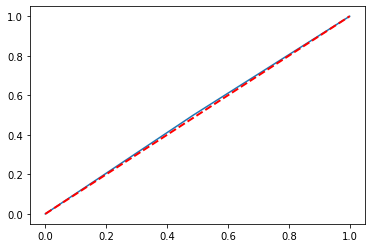

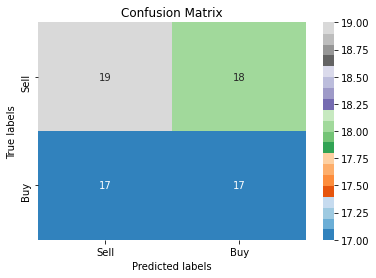

In [35]:
mlpClassifier(kpca_train_X,kpca_test_X, train_y, test_y)

#### 5.3 SVM

AUC: 0.5214626391096979
              precision    recall  f1-score   support

           0       0.54      0.51      0.53        37
           1       0.50      0.53      0.51        34

    accuracy                           0.52        71
   macro avg       0.52      0.52      0.52        71
weighted avg       0.52      0.52      0.52        71



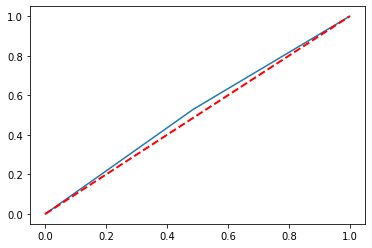

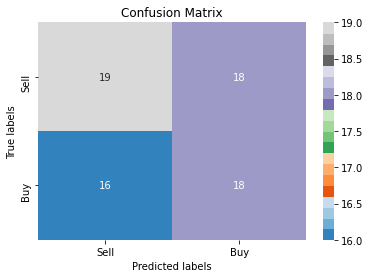

In [36]:
svmClassifier(kpca_train_X, train_y, kpca_test_X, test_y)

#### 5.4 LR

[LibLinear]AUC: 0.5779014308426074
              precision    recall  f1-score   support

           0       0.60      0.57      0.58        37
           1       0.56      0.59      0.57        34

    accuracy                           0.58        71
   macro avg       0.58      0.58      0.58        71
weighted avg       0.58      0.58      0.58        71



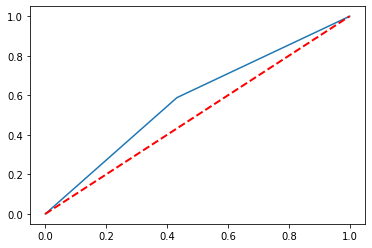

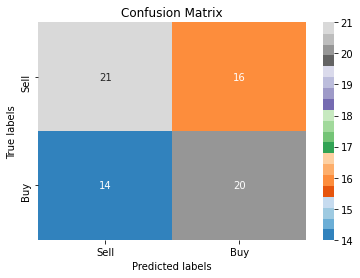

In [37]:
lrClassifier(kpca_train_X,kpca_test_X, train_y, test_y)


